In [91]:
import keras 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
import numpy as np 
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
import keras.optimizers

In [92]:
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
import os

np.random.seed(42)
tf.random.set_seed(42)

In [93]:
# BASE_DIR = os.path.dirname(os.path.abspath(__file__))
# train_path = os.path.join(BASE_DIR, "images")
#train_path='D:\TCS_YF\Research\OpenCV-Python-Series-master\OpenCV-Python-Series-master\src\imageTemp'
train_path = 'D:\TCS_YF\Research\OpenCV-Python-Series-master\OpenCV-Python-Series-master\src\images'
test_path='D:\TCS_YF\Research\OpenCV-Python-Series-master\OpenCV-Python-Series-master\src\imagesTest'
IMAGE_SIZE = [224,224]

In [94]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [95]:
for layer in vgg.layers:
    layer.trainable = False

In [96]:
#folders = glob(train_path)
folders = glob('D:\TCS_YF\Research\OpenCV-Python-Series-master\OpenCV-Python-Series-master\src\images\*')

In [97]:
#folders

In [98]:
# model = Sequential()

# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='VGG16'))

# model.add(Flatten(name='flatten'))

# model.add(Dense(256, activation="relu", name="fc1"))

# model.add(Dense(128, activation="relu", name="fc2"))

# model.add(Dense(196, activation="softmax", name="output"))

In [99]:
x = Flatten()(vgg.output)
#print(vgg.output.shape)
prediction = Dense(56,activation='softmax')(x)
#prediction = Dense(19,activation='softmax')(x)
print(len(folders))
model = Model(inputs=vgg.input, outputs = prediction)

57


In [100]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 56)             │     1,404,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,119,672 (61.49 MB)

 Trainable params: 1,404,984 (5.36 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [101]:
from keras.optimizers import Adam, SGD, RMSprop
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [102]:
#data aug: helps rotate image if face is sideways
import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [103]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True)

In [104]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [105]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 56 classes.
Found 57 images belonging to 56 classes.


In [106]:
print(training_set.classes.shape)
print(test_set.classes.shape)


(253,)
(57,)


In [107]:
import time 
start_time = time.time()
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=9, 
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)
finish = time.time()
print("total time: ")
print(finish-start_time)

Epoch 1/9
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.0379 - loss: 5.6683 - val_accuracy: 0.1053 - val_loss: 4.7904
Epoch 2/9
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/9
1/8 ━━━━━━━━━━━━━━━━━━━━ 1:00 9s/step - accuracy: 0.4375 - loss: 2.9050

KeyboardInterrupt: 

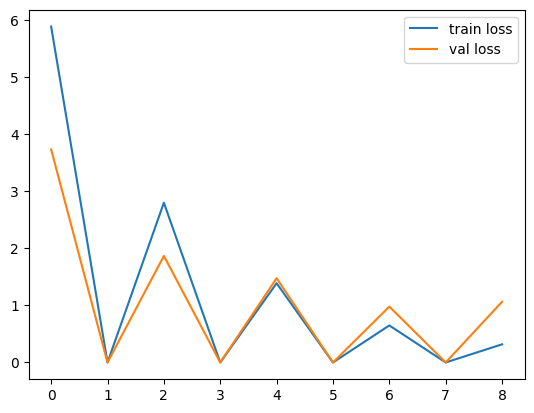

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
model.save('VGGFaceRecoModel.h5')